In [1]:
#Imports
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix,precision_score,f1_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.tree import export_graphviz,export_text
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image
import pydotplus
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
import json
warnings.filterwarnings("ignore")

In [2]:
#Names of columns from our database
df = pd.read_csv("covid_data.csv")
for col in df.columns:
    print(col)
#We change name for future
df.rename(columns= {'DATE_DIED':"DEATH"},inplace=True)

USMER
MEDICAL_UNIT
SEX
PATIENT_TYPE
DATE_DIED
INTUBED
PNEUMONIA
AGE
PREGNANT
DIABETES
COPD
ASTHMA
INMSUPR
HIPERTENSION
OTHER_DISEASE
CARDIOVASCULAR
OBESITY
RENAL_CHRONIC
TOBACCO
CLASIFFICATION_FINAL
ICU


In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [5]:
#All columns I wanna include
cols =['USMER','MEDICAL_UNIT','SEX','PATIENT_TYPE','DEATH','INTUBED','PNEUMONIA','AGE','PREGNANT','DIABETES',
          'COPD','ASTHMA','HIPERTENSION','OTHER_DISEASE',
          'CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']

In [6]:
#Change values in columns to more friendly
def change(column,points,names=None):
    if not names:
        names= range(len(points)+1)
    colCut= pd.cut(column,bins = [column.min()]+ points+[column.max()],labels=names,include_lowest=True)
    return colCut

In [7]:
df['INTUBED']=change(df['INTUBED'],[90],[0,1])
df['PREGNANT']=change(df['PREGNANT'],[97],[0,1])
df['HIPERTENSION']=change(df['HIPERTENSION'],[90],[0,1])
df['PNEUMONIA']=change(df['PNEUMONIA'],[90],[0,1])
df['TOBACCO']=change(df['TOBACCO'],[90],[0,1])
df['OTHER_DISEASE']=change(df['OTHER_DISEASE'],[90],[0,1])
df['CARDIOVASCULAR']=change(df['CARDIOVASCULAR'],[90],[0,1])
df['OBESITY']=change(df['OBESITY'],[90],[0,1])
df['RENAL_CHRONIC']=change(df['RENAL_CHRONIC'],[90],[0,1])
df['ASTHMA']=change(df['ASTHMA'],[90],[0,1])
df['COPD']=change(df['COPD'],[90],[0,1])
df['DIABETES']=change(df['DIABETES'],[90],[0,1])
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,1,0,65,0,0,...,0,2,0,0,0,0,0,0,3,97
1,2,1,2,1,03/06/2020,1,0,72,0,0,...,0,2,0,0,0,0,0,0,5,97
2,2,1,2,2,09/06/2020,0,0,55,0,0,...,0,2,0,0,0,0,0,0,3,2
3,2,1,1,1,12/06/2020,1,0,53,0,0,...,0,2,0,0,0,0,0,0,7,97
4,2,1,2,1,21/06/2020,1,0,68,0,0,...,0,2,0,0,0,0,0,0,3,97


In [8]:
#Deleted columns which I don't understand
df = df.drop('INMSUPR', axis=1)
df = df.drop('CLASIFFICATION_FINAL', axis=1)
df = df.drop('ICU', axis=1)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,2,1,1,1,03/05/2020,1,0,65,0,0,0,0,0,0,0,0,0,0
1,2,1,2,1,03/06/2020,1,0,72,0,0,0,0,0,0,0,0,0,0
2,2,1,2,2,09/06/2020,0,0,55,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,12/06/2020,1,0,53,0,0,0,0,0,0,0,0,0,0
4,2,1,2,1,21/06/2020,1,0,68,0,0,0,0,0,0,0,0,0,0


In [9]:
df_for_stats = df.iloc[:1000000]
cols_for_stats=cols
cols_for_stats.remove("DEATH")
for col in cols:
    print("For ",col,
          ":\nMean: ",df_for_stats[col].astype('int').mean(),
         "\nMin: ",df_for_stats[col].astype('int').min(),
         "\nMax: ",df_for_stats[col].astype('int').max(),
         "\nStd: ",df_for_stats[col].astype('int').std())

For  USMER :
Mean:  1.627172 
Min:  1 
Max:  2 
Std:  0.48355714889092094
For  MEDICAL_UNIT :
Mean:  8.8329 
Min:  1 
Max:  12 
Std:  3.750267944362064
For  SEX :
Mean:  1.501222 
Min:  1 
Max:  2 
Std:  0.49999875671321103
For  PATIENT_TYPE :
Mean:  1.197682 
Min:  1 
Max:  2 
Std:  0.39825115879302275
For  INTUBED :
Mean:  0.809557 
Min:  0 
Max:  1 
Std:  0.39265075821347645
For  PNEUMONIA :
Mean:  0.015837 
Min:  0 
Max:  1 
Std:  0.12484472362581059
For  AGE :
Mean:  41.929601 
Min:  0 
Max:  121 
Std:  16.941643603856352
For  PREGNANT :
Mean:  0.003565 
Min:  0 
Max:  1 
Std:  0.05960112689617811
For  DIABETES :
Mean:  0.003266 
Min:  0 
Max:  1 
Std:  0.05705555625297591
For  COPD :
Mean:  0.002947 
Min:  0 
Max:  1 
Std:  0.0542062554445345
For  ASTHMA :
Mean:  0.002924 
Min:  0 
Max:  1 
Std:  0.053994936238995025
For  HIPERTENSION :
Mean:  0.003045 
Min:  0 
Max:  1 
Std:  0.05509746827877857
For  OTHER_DISEASE :
Mean:  0.00493 
Min:  0 
Max:  1 
Std:  0.07004070249290768
For

In [10]:
repSex = {1: "Female", 2: "Male"}
df.replace({"SEX": repSex},inplace=True)
df['AGE']=change(df['AGE'],[1,11,18,60],["Unknown","Child","Teenager","Adult","Senior"])
repDate={"9999-99-99":0}
df.replace({"DEATH":repDate},inplace=True)
df.loc[df["DEATH"] != 0,"DEATH"]=1
#https://www.kaggle.com/datasets/meirnizri/covid19-dataset


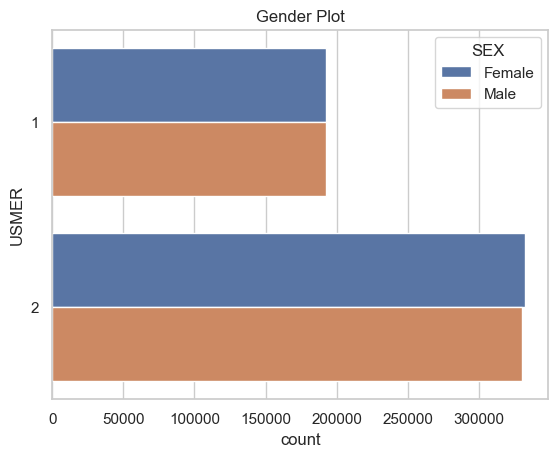

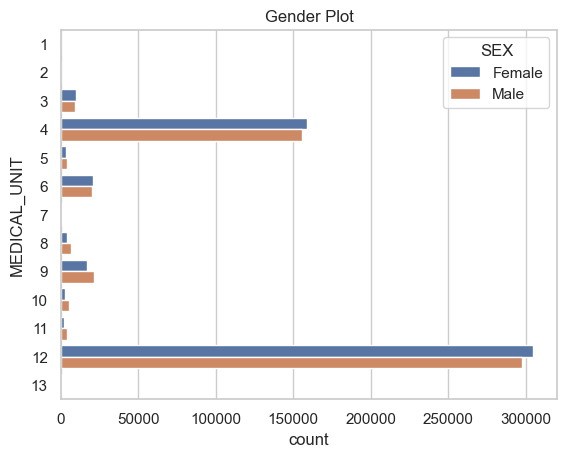

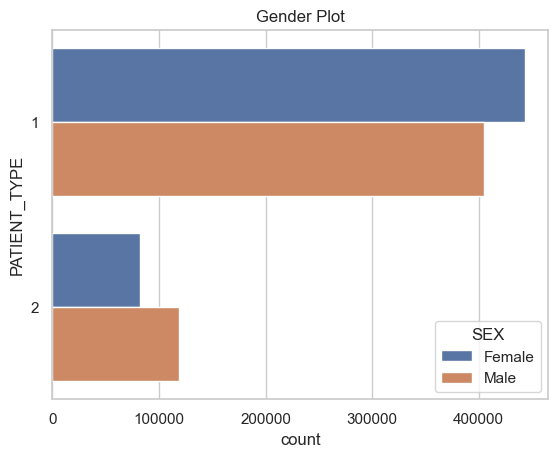

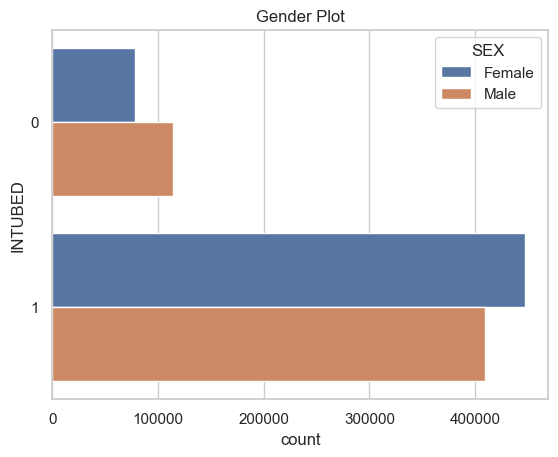

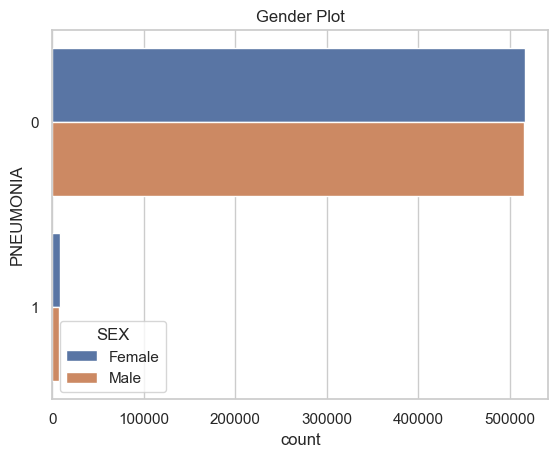

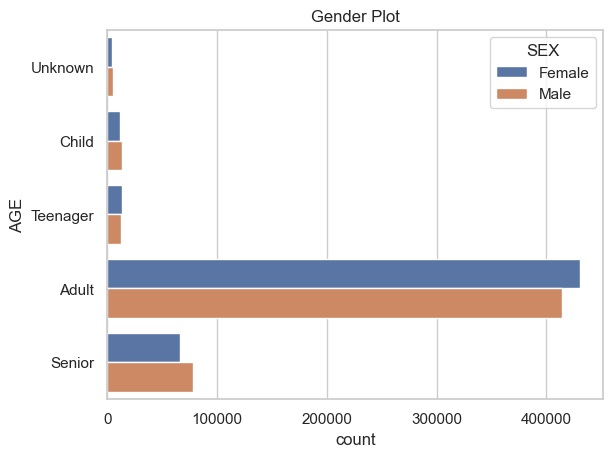

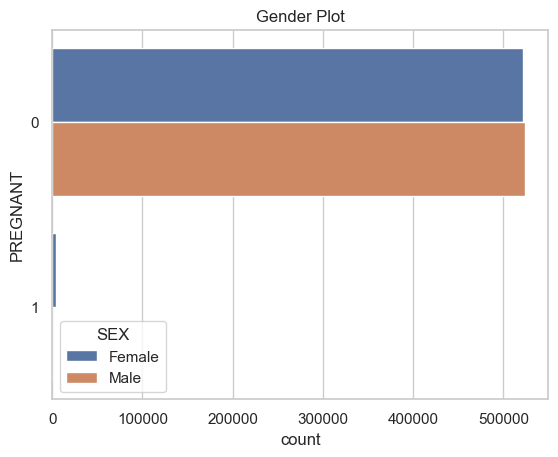

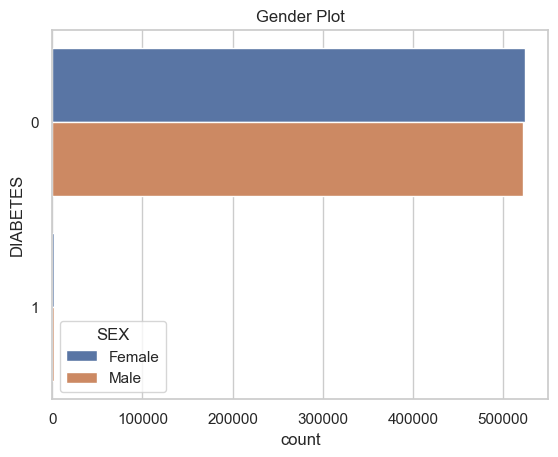

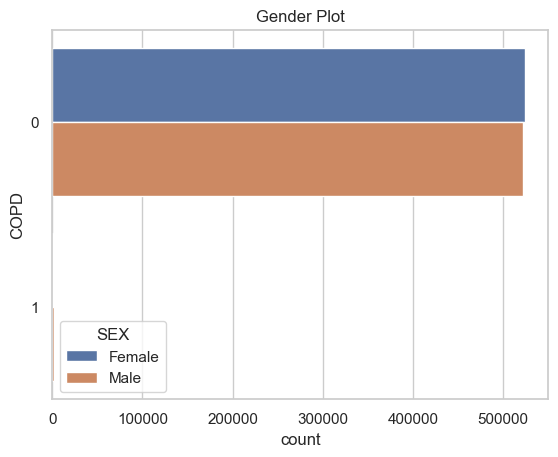

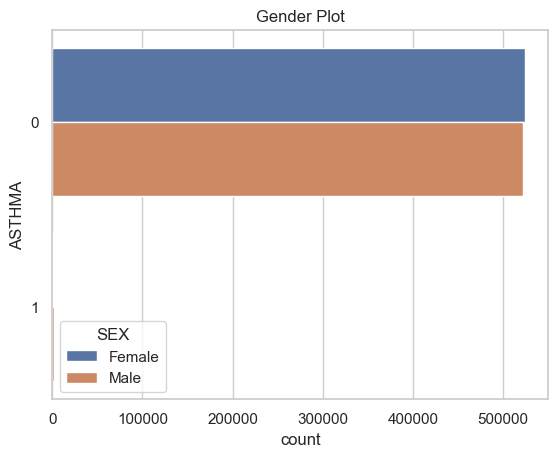

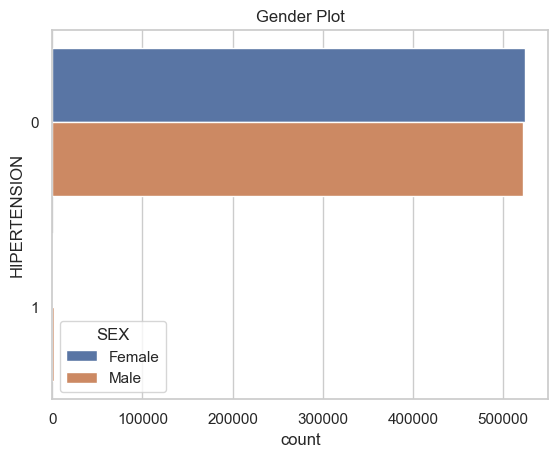

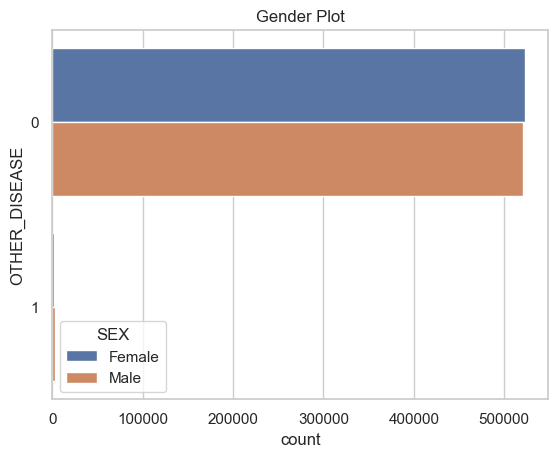

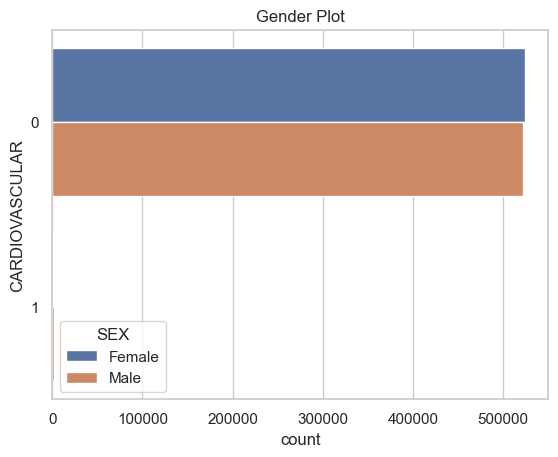

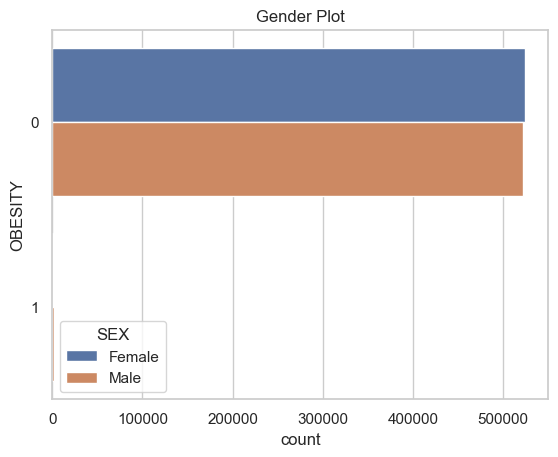

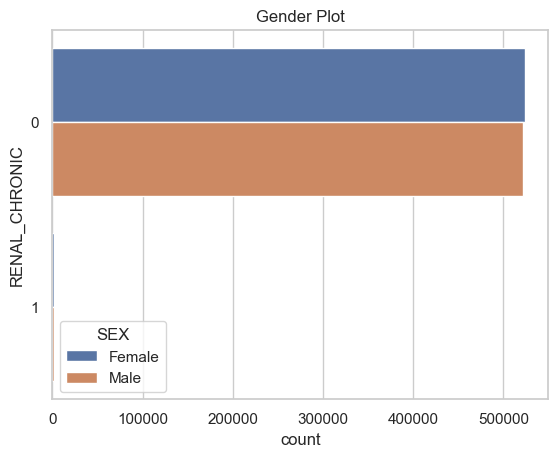

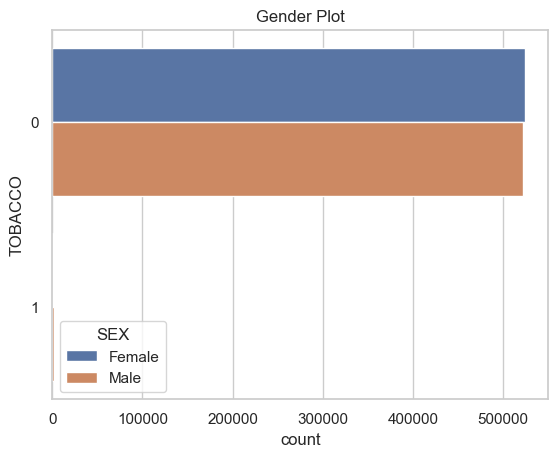

In [11]:
new_cols=cols
new_cols.remove("SEX")
for x in new_cols:
    sns.set(style="whitegrid")
    ax = sns.countplot(y=x, hue="SEX", data=df)
    plt.ylabel(x)
    plt.title('Gender Plot')
    plt.show()
    

In [12]:
#Checking if there are any people who had covid who where obese
df.loc[df['OBESITY']== 1]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
790,2,3,Male,2,1,0,0,Senior,0,1,1,1,1,1,1,1,1,1
853,2,3,Female,2,1,0,0,Senior,0,1,1,1,1,1,1,1,1,1
1210,2,3,Male,2,1,0,0,Senior,0,1,1,1,1,1,1,1,1,1
1352,2,3,Male,2,1,0,0,Adult,0,1,1,1,1,1,1,1,1,1
1428,1,3,Female,2,1,0,0,Senior,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048244,1,13,Female,2,0,0,0,Adult,0,1,1,1,1,1,1,1,1,1
1048258,1,13,Female,2,0,0,0,Adult,0,1,1,1,1,1,1,1,1,1
1048259,1,13,Male,2,0,0,0,Adult,0,1,1,1,1,1,1,1,1,1
1048260,1,13,Male,2,0,0,0,Adult,0,1,1,1,1,1,1,1,1,1


In [13]:
repSex = {"Female": 1,  "Male" : 2}
df.replace({"SEX": repSex},inplace=True)

## Naive Bayes

In [14]:
#Naive-Bayes
def naive_Bayes(X,y,typ):
    y.astype('int')
    X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
    model=typ
    clf=model.fit(X_train,y_train.astype('int'))
    pred_labels=model.predict(X_test)
    print("Classes: ",clf.classes_)
    print("\n*--------------------------------------------------*\n")
    if str(typ)=='GaussianNB()':
        print("Class Priors: ", clf.class_prior_)
    else:
        print("Class Priors: ", clf.class_log_prior_)
    score=model.score(X_test,y_test.astype('int'))
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train.astype('int'))))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test.astype('int'))))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test.astype('int'),pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test.astype('int'), y_pred.astype('int'))
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    return X_train,X_test,y_train.astype('int'),y_test.astype('int'),clf,pred_labels

Classes:  [0 1]

*--------------------------------------------------*

Class Priors:  [0.92659562 0.07340438]

*--------------------------------------------------*

Score:  0.9240254631285316

*--------------------------------------------------*

Training set score: 0.9237
Test set score: 0.9240

*--------------------------------------------------*

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    194349
           1       0.21      0.01      0.03     15366

    accuracy                           0.92    209715
   macro avg       0.57      0.50      0.49    209715
weighted avg       0.87      0.92      0.89    209715


*--------------------------------------------------*



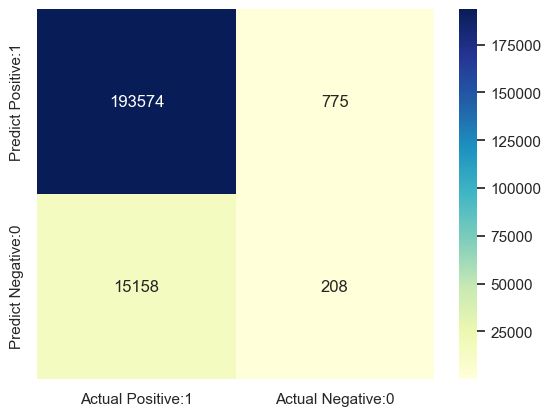

In [15]:
X=df["OTHER_DISEASE"].values.reshape(-1,1)
y=df["DEATH"].values
X_train,X_test,y_train,y_test,clf,pred_labels,=naive_Bayes(X,y,GaussianNB())


Classes:  [0 1]

*--------------------------------------------------*

Class Priors:  [-0.07623804 -2.61177164]

*--------------------------------------------------*

Score:  0.9267291323939633

*--------------------------------------------------*

Training set score: 0.9266
Test set score: 0.9267

*--------------------------------------------------*

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    194349
           1       0.00      0.00      0.00     15366

    accuracy                           0.93    209715
   macro avg       0.46      0.50      0.48    209715
weighted avg       0.86      0.93      0.89    209715


*--------------------------------------------------*



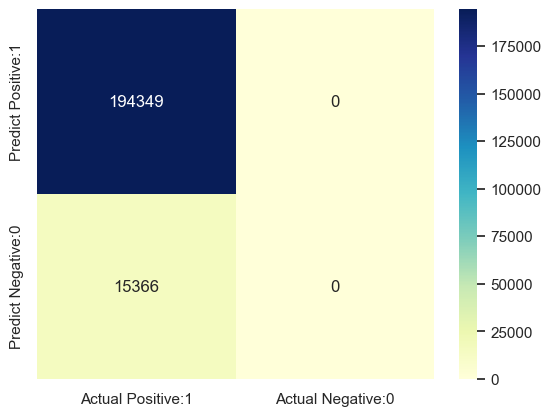

In [16]:
X=df["OTHER_DISEASE"].values.reshape(-1,1)
y=df["DEATH"].values
X_train,X_test,y_train,y_test,clf,pred_labels,=naive_Bayes(X,y,BernoulliNB())

## KNN

In [17]:
#KNN
def knn(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
    knn_model = KNeighborsClassifier(n_neighbors=20)
    knn_model.fit(X_train, Y_train.astype("int"))
    Y_predict_knn = knn_model.predict(X_test)
    #Comparing the output I expected (Y_test) against the ones the model predicted (Y_predict)
    knn_metrics = metrics.classification_report(Y_test.astype("int"),Y_predict_knn.astype("int"))
    print(knn_metrics)
    table = pd.DataFrame(Y_test.astype("int"))
    print('table 1')
    print(table.head())
    #add the predictions to the dataframe
    table['predictions'] = Y_predict_knn.astype("int")
    print('table 2')
    print(table.head())
    accuracy_knn = accuracy_score(Y_test.astype("int"),Y_predict_knn.astype("int"))
    precision_knn = precision_score(Y_test.astype("int"), Y_predict_knn.astype("int"))
    f1_knn = f1_score(Y_test.astype("int"),Y_predict_knn.astype("int"))
    recall_knn = recall_score(Y_test.astype("int"), Y_predict_knn.astype("int"))
    print("Precission: ",precision_knn)
    print("Accuracy: ",accuracy_knn)
    print("F1: ",f1_knn)
    print("Recall: ", recall_knn)
    plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[accuracy_knn,f1_knn,recall_knn,precision_knn],color=['red','green','purple','orange'])
    plt.plot([accuracy_knn,f1_knn,recall_knn,precision_knn],color='black')
    plt.title('Evaluation Metrics for K-Nearest Neighbors')
    plt.show
    cm = confusion_matrix(Y_test.astype('int'), Y_predict_knn.astype('int'))
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

              precision    recall  f1-score   support

           0       0.59      1.00      0.74     17644
           1       0.71      0.00      0.01     12356

    accuracy                           0.59     30000
   macro avg       0.65      0.50      0.37     30000
weighted avg       0.64      0.59      0.44     30000

table 1
   0
0  1
1  0
2  1
3  1
4  0
table 2
   0  predictions
0  1            0
1  0            0
2  1            0
3  1            0
4  0            0
Precission:  0.7083333333333334
Accuracy:  0.5888
F1:  0.005482102547565302
Recall:  0.002751699579151829


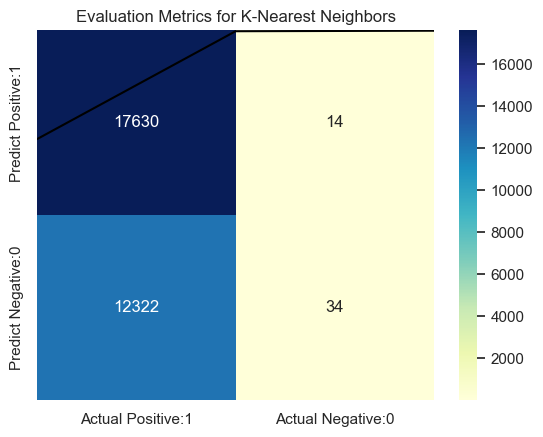

In [18]:
knn(X=df["OTHER_DISEASE"].iloc[:100000].values.reshape(-1,1),
Y = df["DEATH"].iloc[:100000].values)

## Decision Trees

Score:  0.58645


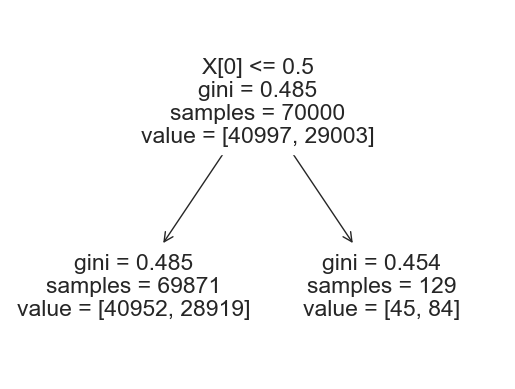

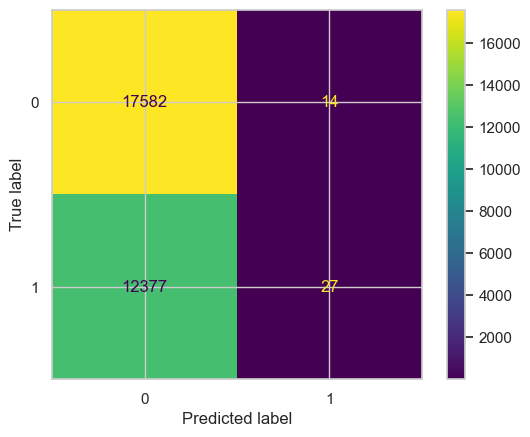

In [19]:
X=df["OTHER_DISEASE"].iloc[:100000].values.reshape(-1,1)
y = df["DEATH"].iloc[:100000].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["OTHER_DISEASE"],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_DT1.png')
Image(graph.create_png())
print("Score: ", clf.score(X,y))
plot_confusion_matrix(clf,X_test,y_test)

In [20]:
#https://scikit-learn.org/stable/modules/tree.html
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
print(clf.predict(X_test))


[0.41366323 0.41366323 0.41366323 ... 0.41366323 0.41366323 0.41366323]


Score:  0.58593


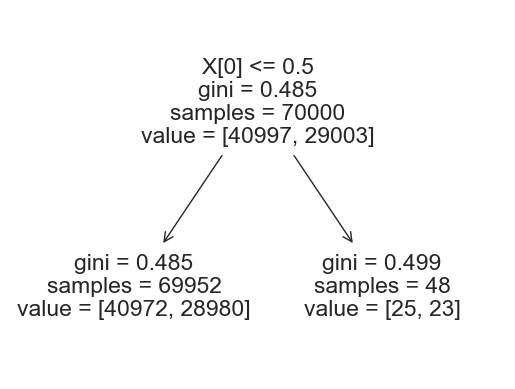

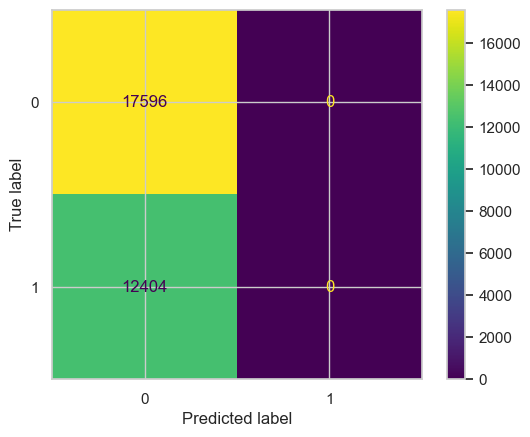

In [21]:
X=df["OBESITY"].iloc[:100000].values.reshape(-1,1)
y = df["DEATH"].iloc[:100000].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["OBESITY"],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_DT2.png')
Image(graph.create_png())
print("Score: ", clf.score(X,y))
plot_confusion_matrix(clf,X_test,y_test)

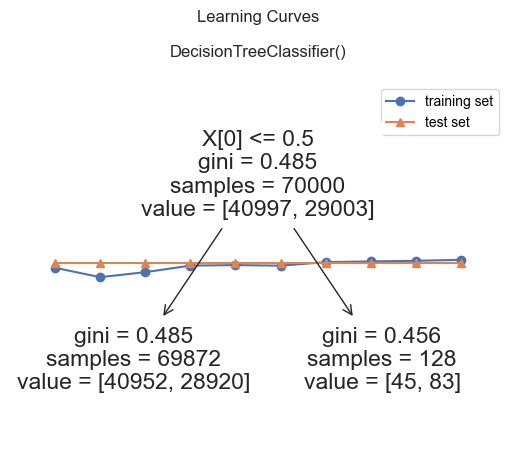

Score:  0.58651


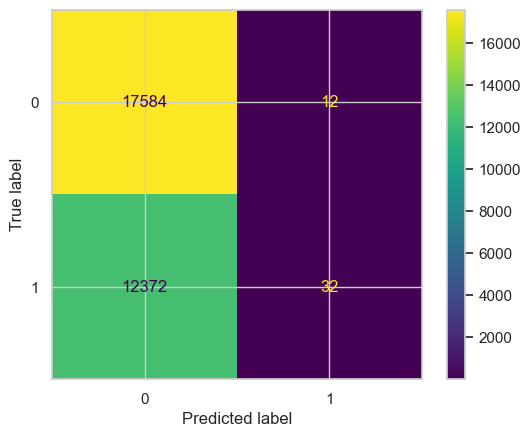

In [22]:
X=df["TOBACCO"].iloc[:100000].values.reshape(-1,1)
y = df["DEATH"].iloc[:100000].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["TOBACCO"],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_DT.png')
Image(graph.create_png())
plot_learning_curves(X_train, y_train, X_test, y_test,clf)
plt.show()
print("Score: ", clf.score(X,y))
plot_confusion_matrix(clf,X_test,y_test)

Score:  0.99957


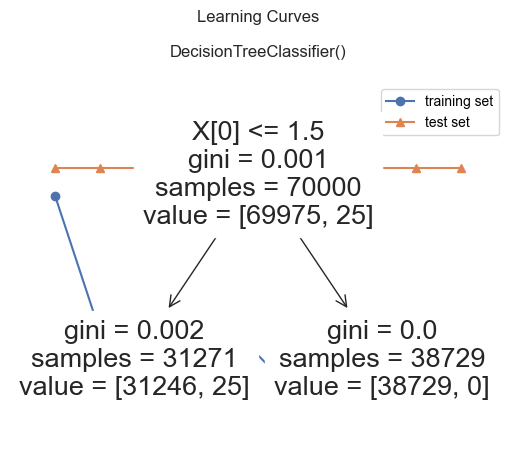

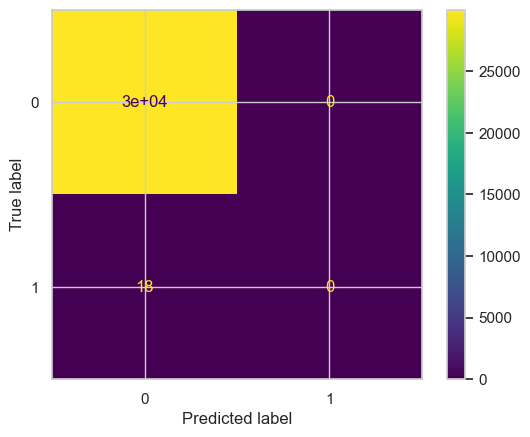

In [23]:
X=df["SEX"].iloc[:100000].values.reshape(-1,1)
y = df["PREGNANT"].iloc[:100000].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["TOBACCO"],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_DT.png')
Image(graph.create_png())
print("Score: ", clf.score(X,y))
plot_learning_curves(X_train, y_train, X_test, y_test,clf)
plt.show()
plot_confusion_matrix(clf,X_test,y_test)

## Neural Networks

In [24]:
X=df["TOBACCO"].iloc[:100000].values.reshape(-1,1)
y = df["DEATH"].iloc[:100000].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
def neural_network(hidden_layer_sizes,max_iter,activation,solver,learning_rate,X,y):
    scaler = StandardScaler()

    scaler.fit(X_train)

    train_data = scaler.transform(X_train)
    test_data = scaler.transform(X_test)
    print(train_data[:3])

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate)

    mlp.fit(train_data, y_train)

    predictions_train = mlp.predict(train_data)
    predictions_test = mlp.predict(test_data)
    percent = (mlp.score(test_data, y_test))
    print("Percent: ",percent)
    plot_learning_curves(X_train, y_train, X_test, y_test,mlp)
    plt.show()
    return ["Neural Network", percent, mlp]
#https://www.projectpro.io/recipes/plot-learning-curve-in-python

[[-0.04280095]
 [-0.04280095]
 [-0.04280095]]
Percent:  0.5872


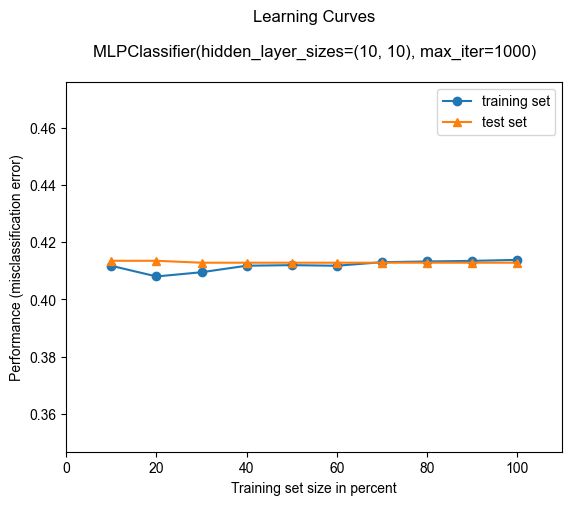

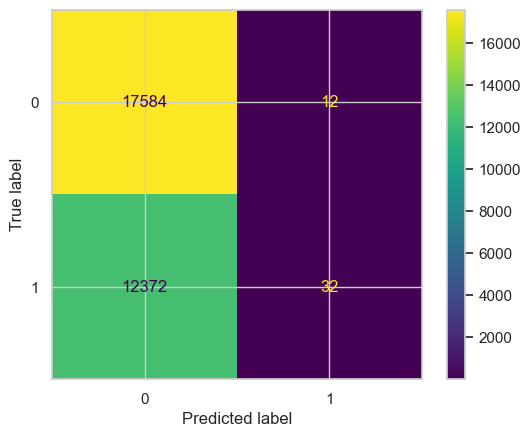

In [25]:
r=neural_network((10, 10),1000,'relu','adam','constant',X,y)
plot_confusion_matrix(r[2],X_test,y_test)

[[-0.04280095]
 [-0.04280095]
 [-0.04280095]]
Percent:  0.5865333333333334


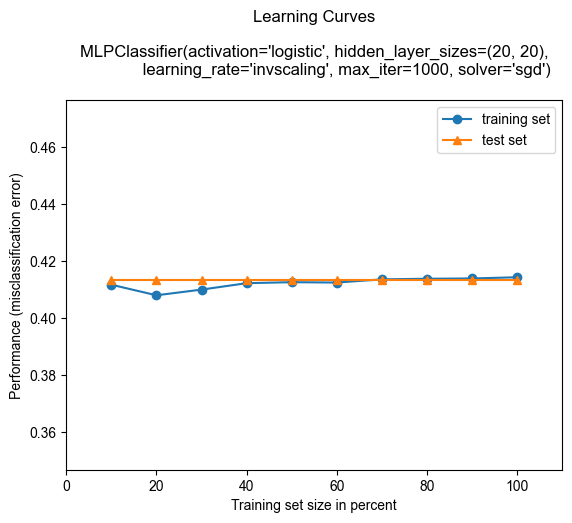

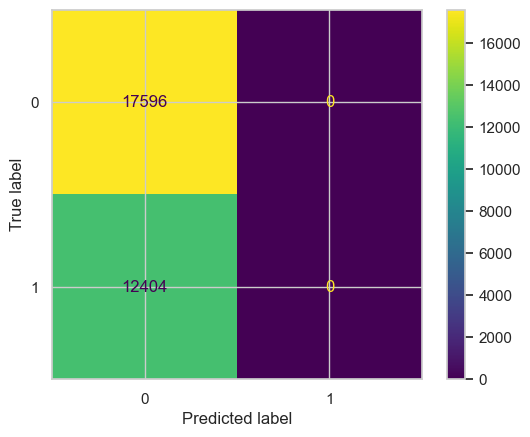

In [26]:
r=neural_network((20, 20),1000,'logistic','sgd','invscaling',X,y)
plot_confusion_matrix(r[2],X_test,y_test)

[[-0.04280095]
 [-0.04280095]
 [-0.04280095]]
Percent:  0.5872


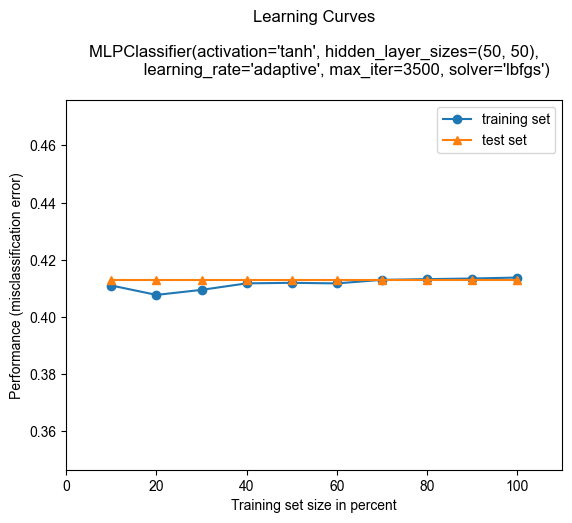

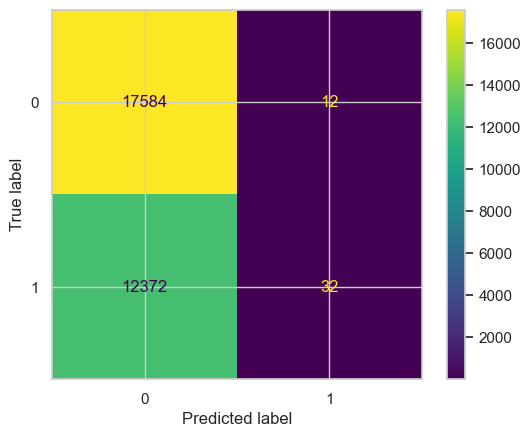

In [27]:
r=neural_network((50, 50),3500,'tanh','lbfgs','adaptive',X,y)
plot_confusion_matrix(r[2],X_test,y_test)

## Summary

Text(0.5, 1.0, 'Classifiers!')

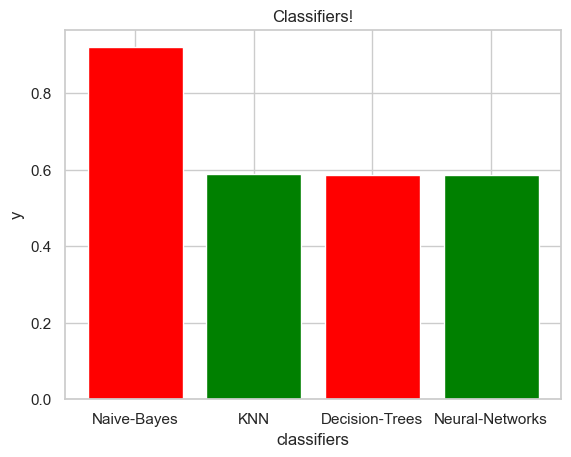

In [28]:
left = [1, 2, 3, 4]  
height = [0.92, 0.588, 0.586,0.587]
tick_label = ['Naive-Bayes', 'KNN', 'Decision-Trees', 'Neural-Networks']
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
plt.xlabel('classifiers')
plt.ylabel('y')
plt.title('Classifiers!')

## Linear Regression

Score: 6.877174786146245e-05
Coef [0.26277104]
Intercept 0.4139206860165362
Predict [0.41392069 0.41392069 0.41392069 ... 0.41392069 0.41392069 0.41392069]


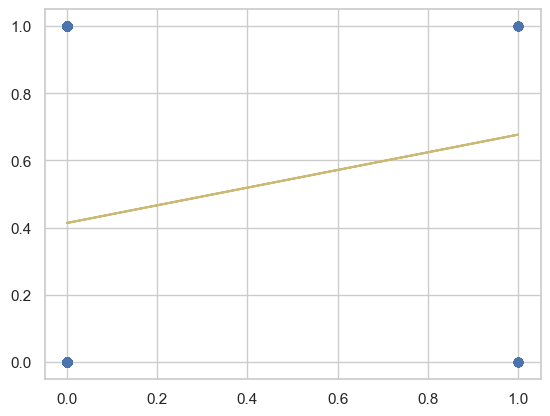

In [29]:
X=df["OTHER_DISEASE"].iloc[:100000].values.reshape(-1,1)
y = df["DEATH"].iloc[:100000].values.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
print("Score:",reg.score(X_test, y_test))

print("Coef",reg.coef_)

print("Intercept",reg.intercept_)

print("Predict",reg.predict(X_test))
plt.scatter(X_test, y_test,color ='b')
plt.plot(X_test, reg.predict(X_test),color ='y');
plt.show()

## LogisticRegression

Score: 0.58708
Coef [[1.05045662]]
Intercept [-0.34772265]
Predict [0 0 0 ... 0 0 0]


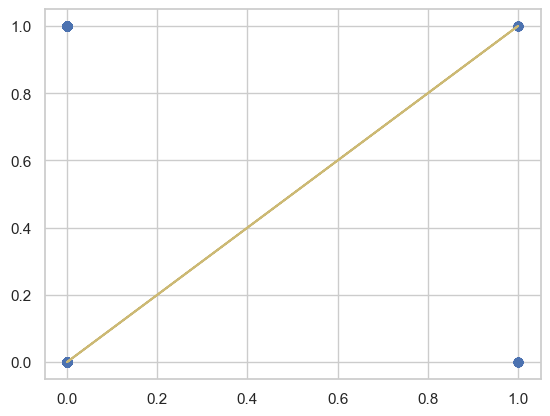

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg =LogisticRegression(random_state=16).fit(X_train, y_train)
print("Score:",reg.score(X_test, y_test))

print("Coef",reg.coef_)

print("Intercept",reg.intercept_)

print("Predict",reg.predict(X_test))
plt.scatter(X_test, y_test,color ='b')
plt.plot(X_test, reg.predict(X_test),color ='y');
plt.show()

In [31]:
repSex = {1: "Female", 2: "Male"}
df.replace({"SEX": repSex},inplace=True)

## Aprori

In [32]:
#Using TransactionEncoder, could take few minutes, I had to drop rows because it wouldn't compile
data = []
df_te=df.iloc[:2000]
df_te['INTUBED']=change(df_te['INTUBED'],[0.5],["NOT INTUBED","INTUBED"])
df_te['PREGNANT']=change(df_te['PREGNANT'],[0.5],['NOT PREGNANT','PREGNANT'])
df_te['TOBACCO']=change(df_te['TOBACCO'],[0.5],["NOT TOBACOO","TOBACCO"])
df_te['OTHER_DISEASE']=change(df_te['OTHER_DISEASE'],[0.5],["NOT OTHER DISEASE","OTHER_DISEASE"])
df_te['OBESITY']=change(df_te['OBESITY'],[0.5],["NOT OBESITY","OBESITY"])
df_te['ASTHMA']=change(df_te['ASTHMA'],[0.5],['NOT ASTHMA','ASTHMA'])
df_te['DIABETES']=change(df_te['DIABETES'],[0.5],["NOT DIABETES","DIABETES"])
df_te['DEATH']=change(df_te['DEATH'],[0.5],["NO","YES"])
df_te = df_te.drop('MEDICAL_UNIT', axis=1)
df_te = df_te.drop('USMER', axis=1)
df_te = df_te.drop('CARDIOVASCULAR', axis=1)
df_te = df_te.drop('HIPERTENSION', axis=1)
df_te = df_te.drop('PNEUMONIA', axis=1)
df_te = df_te.drop('RENAL_CHRONIC', axis=1)
df_te = df_te.drop('PATIENT_TYPE', axis=1)
df_te = df_te.drop('COPD', axis=1)

for i in range(0, df_te.shape[0]-1):
    data.append([str(df_te.values[i,j]) for j in range(0, df_te.shape[1])])

    
th = TransactionEncoder()
th_arr = th.fit(data).transform(data)
new_df = pd.DataFrame(th_arr,columns=th.columns_)
new_df.head()


,ASTHMA,Adult,Child,DIABETES,Female,INTUBED,Male,NO,NOT ASTHMA,NOT DIABETES,...,NOT PREGNANT,NOT TOBACOO,OBESITY,OTHER_DISEASE,PREGNANT,Senior,TOBACCO,Teenager,Unknown,YES
0,False,False,False,False,True,True,False,False,True,True,...,True,True,False,False,False,True,False,False,False,True
1,False,False,False,False,False,True,True,False,True,True,...,True,True,False,False,False,True,False,False,False,True
2,False,True,False,False,False,False,True,False,True,True,...,True,True,False,False,False,False,False,False,False,True
3,False,True,False,False,True,True,False,False,True,True,...,True,True,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,True,False,True,True,...,True,True,False,False,False,True,False,False,False,True


In [33]:
apr = apriori(new_df,min_support = 0.2, use_colnames = th.columns_)
apr.head()

,support,itemsets
0,0.495248,(Adult)
1,0.406203,(Female)
2,0.302151,(INTUBED)
3,0.593797,(Male)
4,0.248624,(NO)


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
My configuration:  antecedent support  :  0.7
               antecedents                                        consequents  \
0             (NOT ASTHMA)                                            (Adult)   
1           (NOT DIABETES)                                            (Adult)   
2            (NOT OBESITY)                                            (Adult)   
3      (NOT OTHER DISEASE)                                            (Adult)   
4           (NOT PREGNANT)                                            (Adult)   
...                    ...                                                ...   
28630       (NOT DIABETES)  (Senior, Male, YES, NOT TOBACOO, NOT ASTHMA, N...   
28631         (NOT ASTHMA)  (Senior, Male, YES, NOT TOBACOO, NOT DIABETES,...   
28632       (NOT PREGNANT)  (Senior, Male, YES, NOT TOBACOO, NOT DIABETES,...   
28633  (NOT OTHER

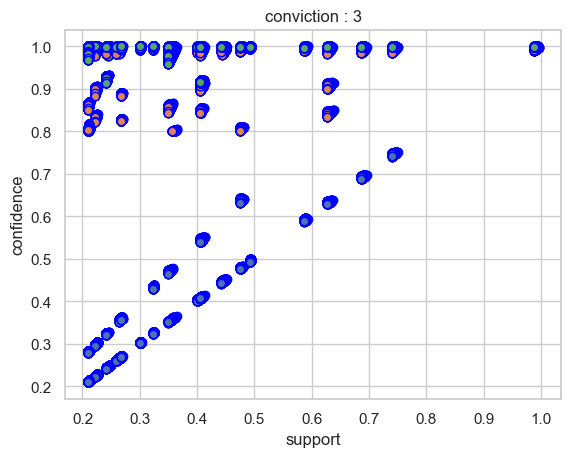

In [34]:
config = [ ('antecedent support',0.7),('confidence',0.8),('conviction',3)]
for metric, new_th in config:
    rules = association_rules(apr, metric = metric, min_threshold=new_th)
    if rules.empty:
        print("Dataframe is Empty")
    print(rules.columns.values)
    print("My configuration: ", metric, " : ",new_th)
    print(rules)
    
    support = rules.loc[:,"support"]
    confidence = rules.loc[:,'confidence']
    plt.scatter(support,confidence,edgecolors="blue")
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric+' : ' +str(new_th))
    plt.savefig('plot%03s.png'%(metric))

    

In [35]:
print(rules[rules['antecedents']==frozenset({"Male", "Senior", "NOT OTHER DISEASE"})].to_string())
print("\n-------------------------------------------\n")
print(rules[rules['antecedents']==frozenset({'Male'})].to_string())
print("\n-------------------------------------------\n")
print(rules[rules['antecedents']==frozenset({'Adult'})].to_string())
print("\n-------------------------------------------\n")

                            antecedents                                                              consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
653   (Senior, Male, NOT OTHER DISEASE)                                                            (NOT OBESITY)             0.26063            0.996998  0.260630    1.000000  1.003011  0.000782         inf
667   (Senior, Male, NOT OTHER DISEASE)                                                           (NOT PREGNANT)             0.26063            0.998999  0.260630    1.000000  1.001002  0.000261         inf
669   (Senior, Male, NOT OTHER DISEASE)                                                                    (YES)             0.26063            0.751376  0.242621    0.930902  1.238930  0.046790    3.598146
1987  (Senior, Male, NOT OTHER DISEASE)                                                        (YES, NOT ASTHMA)             0.26063            0.747374  0.242121    0.9289